# HiMCM Session 8
# Unconstrained Optimization Methods

# Economic Order Quantity

Company Johnson & Johnson Medical assembles certain medical components into surgical kits that will then be sold to hospital around the world. Ordering this medical component costs a fixed amount of \\$5000 (regardless of the amount). Holding extra components in the company's warehouse costs money, too. Each unit costs $1 per day at the warehouse. If J&JM plans to consume 100 units per day, how oftern should the company order the medical components so that the total cost is minimized?

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# the following "magic command" makes plots automatically displayed
%matplotlib inline

## Problem Analysis
Let's consider three different strategies:

**Strategy 1**: Make an order every day:
- Order 100 units each time
- No holding cost
- $\textit{Cost per day} = 5000$
- Average cost per unit = 5000 / 100 = 50

**Strategy 2**: Make an order every 10 days:
- Order 1000 units each time
- Holding cost = 900 + 800 + 700 + ... + 100 = 4500
- Cost per unit = (4500 + 5000) / 1000 = 9.5

In [6]:
Q = 1000
sum = 0

while Q > 0:
    Q = Q - 100
    sum = sum + Q
    
print(sum)


4500


In [8]:
Q = 900
sum = 0
for i in range(Q, 0, -100):
    sum += i
print(sum)

4500


**Strategy 3**: Make an order every 50 days:
- Order 5000 units each time
- Holding cost = 4900 + 4800 + ... + 100
- Cost per unit = (holding cost + 5000) / 5000 = 25.5

In [10]:
Q = 4900
holding_cost = 0
for i in range(Q, 0, -100):
    holding_cost += i
print("Holding cost:", holding_cost)

cost_per_unit = (holding_cost + 5000) / 5000
print("Cost per unit:", cost_per_unit)

Holding cost: 122500
Cost per unit: 25.5


**Observations**:
- Ordering too ofter: too much fixed ordering cost
- Ordering infrequently: too much holding cost
- There should be a "sweet spot"

We need to build a mathematical model to find the best ordering strategy.

## Assumptions and Justifications
1. The amount of medical components needed every day is a constant.
2. The cost of each order is a constant. (What if this is not the case?)
3. The holding cost of each unit is a constant.
4. The amount of units for each order can be arbitrarily large. (What if this is not the case?)
5. There is no **time value** of money. (What if this is not the case?)
6. Components are delivered immediately.

## Variables

- **D**: Daily quantity demanded
- **Q**: Volume per order
- **S**: Fixed ordering cost
- **C**: Unit cost (*omiited*)
- **H**: Holding cost
- **i**: Carrying cost (interest rate,  *omiited*) 
- **U**: Cost of under-production (*omitted*)
- **T**: Place an order every $T$ days. $T = Q / D$.

## Model Construction

Let $q(t)$ be the amount of medical components in the warehouse at the end the $t$-th day. 
- The initial amount is Q. Namely, $q(0) = Q$.
- Each day $D$ units are consumed.
- If less than $D$ units are left at the end of the $t$-th day, then a new order must be placed.

- $q(t) = Q - tD$ if $0<t<T$.
- $q(t) = Q - (t - T)D$ if $ T < t < 2T$.
- ...

In [11]:
# Define the function q(t)
def q(t, Q, D):
    
    T = int(Q / D)
    days_in_cycle = t % T
    return Q - days_in_cycle * D

In [13]:
# Test q(t)

q(2, 5000, 100)

4800

In [23]:
# Define constants

Q = 1000
D = 100

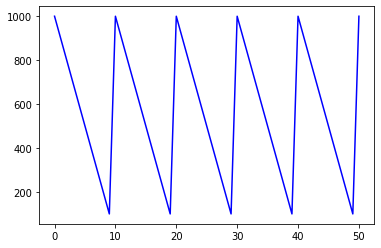

In [24]:
# Plot the graph of q(t)

# ts = [0, 1, ..., 50]
ts = range(0, 51) # the second parameter is exclusive
qs = []
for t in ts:
    qs.append(q(t, Q, D))
plt.plot(ts, qs, 'b-')

The total cost in each cycle is the sum of ordering cost and holding cost. **How to calculate them?**

- holding cost = (T - 1)DH + (T - 2)DH + ... + DH = DH(1 + ... + T-1) = $\frac{T(T-1)DH}{2}$
- total cost in a cycle = holding cost + ordering cost = $\frac{T(T-1)DH}{2} + S$

Calculate the average cost per unit.
- average cost per unit = total cost in a cycle / volumn of order = $\frac{(T-1)H}{2} + \frac{S}{TD}$

In [5]:
# Plot the average cost as a function of T.



How to find the value of $T$ that minimizes the average cost?

- Calculate its derivative.
- Use inequality: $a + b \ge 2\sqrt{ab}$
- Use Python

Solution: The average cost is minimum when $T = \sqrt{\frac{2S}{DH}}$

## Analysis
**Sanity Check**: does the result align with our intuition?
- How often should the company place orders when the ordering cost is high?
- How often should the company place orders when the holding cost is high?

**Sensitivity Analysis**: How sensitive is the optimal $T$ to the parameters?
- $Q$
- $S$
- $H$

## Limitations of the Solution
- Doesn't consider the cost of production
- The ordering cost is assumed to be a constant
- Doesn't consider the limit of a single order
- Doesn't consider the time value of money
- Doesn't consider the option to produce less

## Improve the Model by Allowing Underproduction

**Additional Assumption:**
- The company can choose to produce less than $D$ products per day. If $D - B$ products are produced, the **underproduction cost** is $\$Bc$.
- $T$ and $Q$ no longer satisfies $T = Q / D$.

- $q(t) = ?$
- Total cost?
- Daily cost?
- Optimal $T$?